<a href="https://colab.research.google.com/github/suvidhasrivastava/102103019_topsis_pretrainedmodel/blob/main/Topsis_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Step 1:
# Define the models
models = ["bert-base-uncased", "gpt2", "distilbert-base-uncased", "facebook/bart-large", "microsoft/DialoGPT-medium"]

# Generate random values for each metric
np.random.seed(0)  # For reproducibility
accuracy = np.random.rand(len(models))
response_time = np.random.rand(len(models))
perplexity = np.random.rand(len(models))
f1_score = np.random.rand(len(models))
memory_usage = np.random.rand(len(models))

# Create a DataFrame
model_data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Response_Time': response_time,
    'Perplexity': perplexity,
    'F1_Score': f1_score,
    'Memory_Usage': memory_usage
})

# Save to CSV
model_data.to_csv('model_performance.csv', index=False)

In [3]:
# Step 2: TOPSIS Analysis
# Load data from the CSV file
data = pd.read_csv('model_performance.csv')

# Extract relevant columns
accuracy = data['Accuracy'].values
response_time = data['Response_Time'].values
perplexity = data['Perplexity'].values
f1_score = data['F1_Score'].values
memory_usage = data['Memory_Usage'].values

# Weights for each parameter (adjust these weights based on your criteria)
weights = np.array([0.3, 0.2, 0.2, 0.2, 0.1])

# Normalize the matrix
normalized_matrix = np.column_stack([
    accuracy / np.max(accuracy),
    1 - (response_time / np.max(response_time)),
    1 - (perplexity / np.max(perplexity)),
    f1_score / np.max(f1_score),
    1 - (memory_usage / np.max(memory_usage))
])

# Calculate the weighted normalized decision matrix
weighted_normalized_matrix = normalized_matrix * weights

# Ideal and Negative Ideal solutions
ideal_solution = np.max(weighted_normalized_matrix, axis=0)
negative_ideal_solution = np.min(weighted_normalized_matrix, axis=0)

# Calculate the separation measures
distance_to_ideal = np.sqrt(np.sum((weighted_normalized_matrix - ideal_solution)**2, axis=1))
distance_to_negative_ideal = np.sqrt(np.sum((weighted_normalized_matrix - negative_ideal_solution)**2, axis=1))

# Calculate the TOPSIS scores
topsis_scores = distance_to_negative_ideal / (distance_to_ideal + distance_to_negative_ideal)

# Rank the models based on TOPSIS scores
data['TOPSIS_Score'] = topsis_scores
data['Rank'] = data['TOPSIS_Score'].rank(ascending=False)

# Print the results
print("Model Ranking:")
print(data[['Model', 'TOPSIS_Score', 'Rank']].sort_values(by='Rank'))

# Save the results to a new CSV file
data.to_csv('result.csv', index=False)

Model Ranking:
                       Model  TOPSIS_Score  Rank
4  microsoft/DialoGPT-medium      0.715393   1.0
2    distilbert-base-uncased      0.578920   2.0
1                       gpt2      0.446945   3.0
3        facebook/bart-large      0.429755   4.0
0          bert-base-uncased      0.251812   5.0


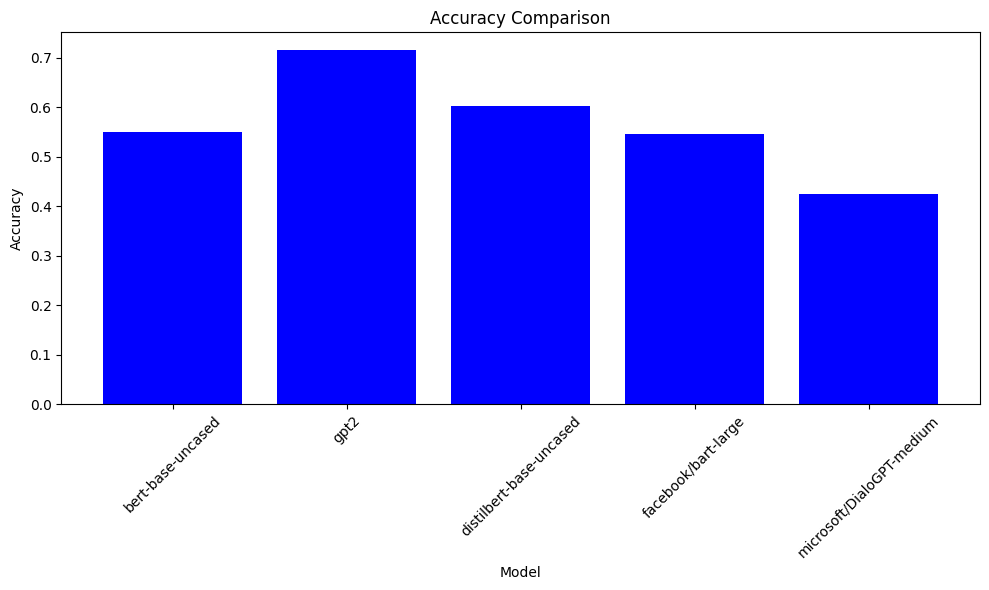

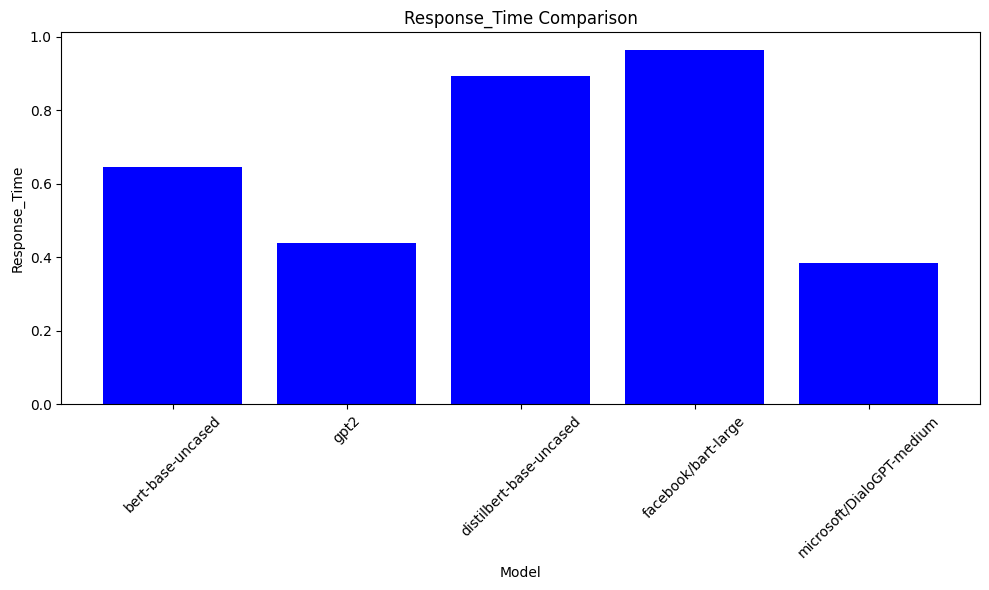

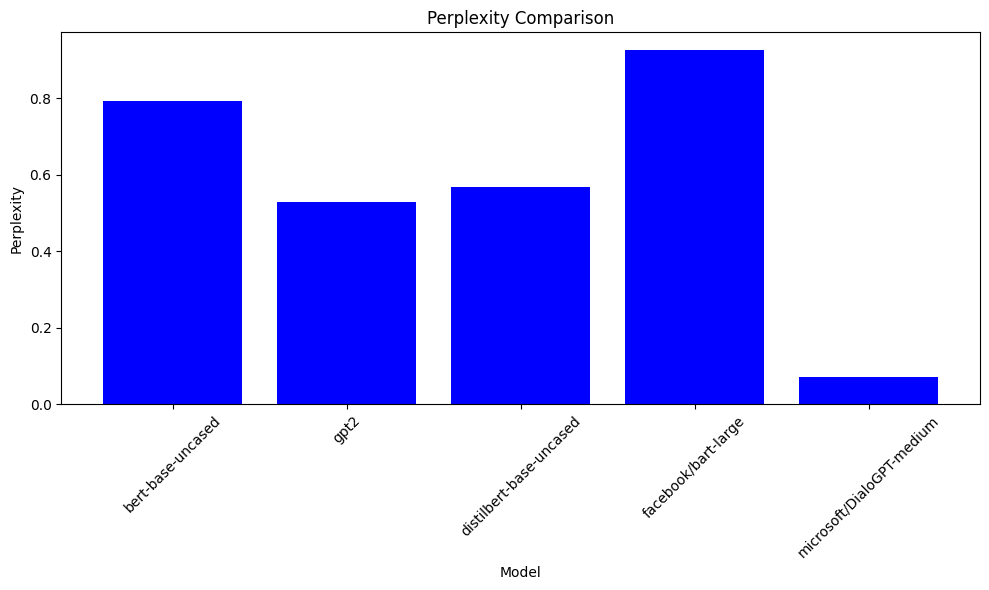

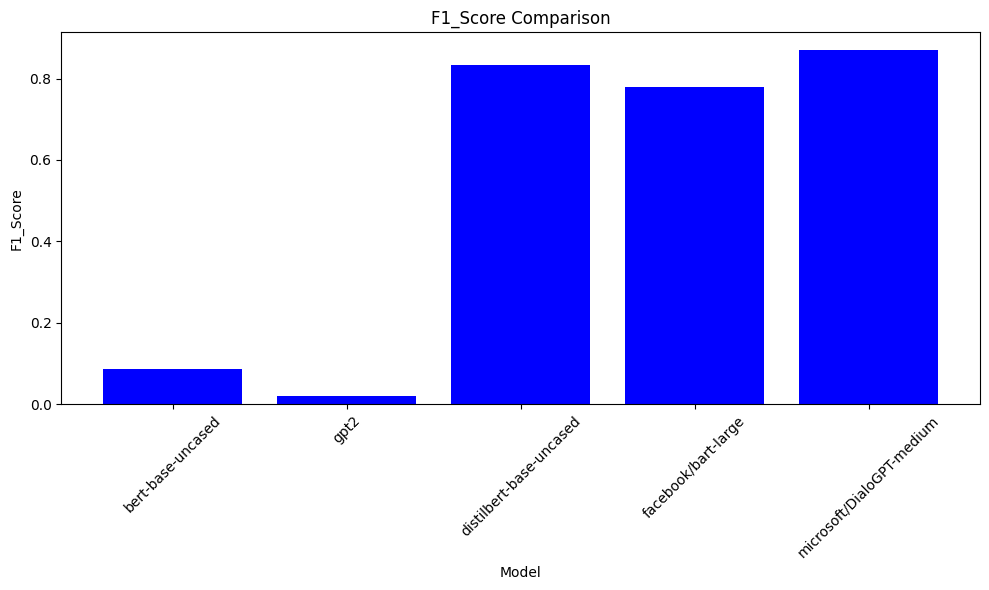

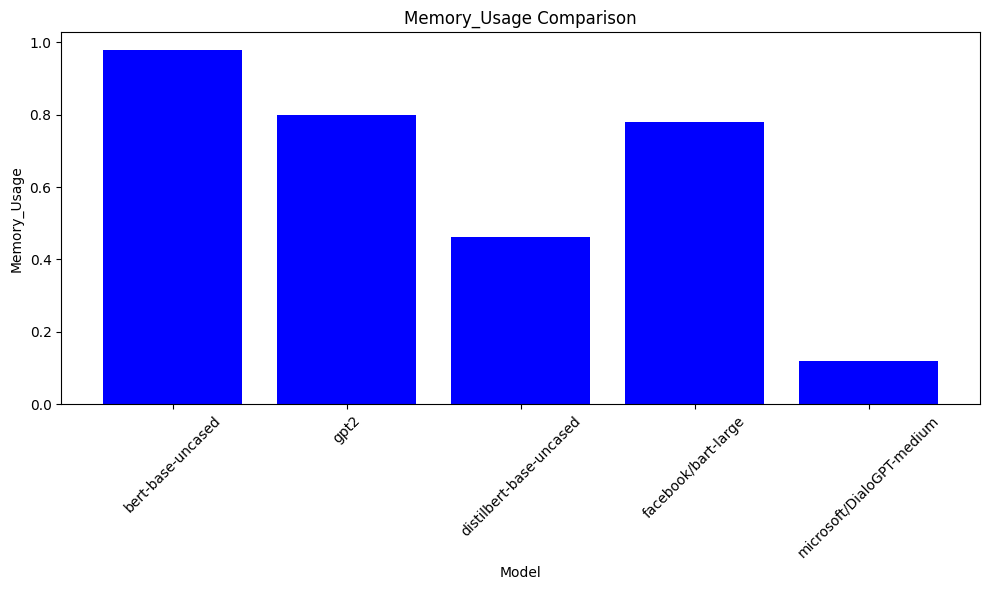

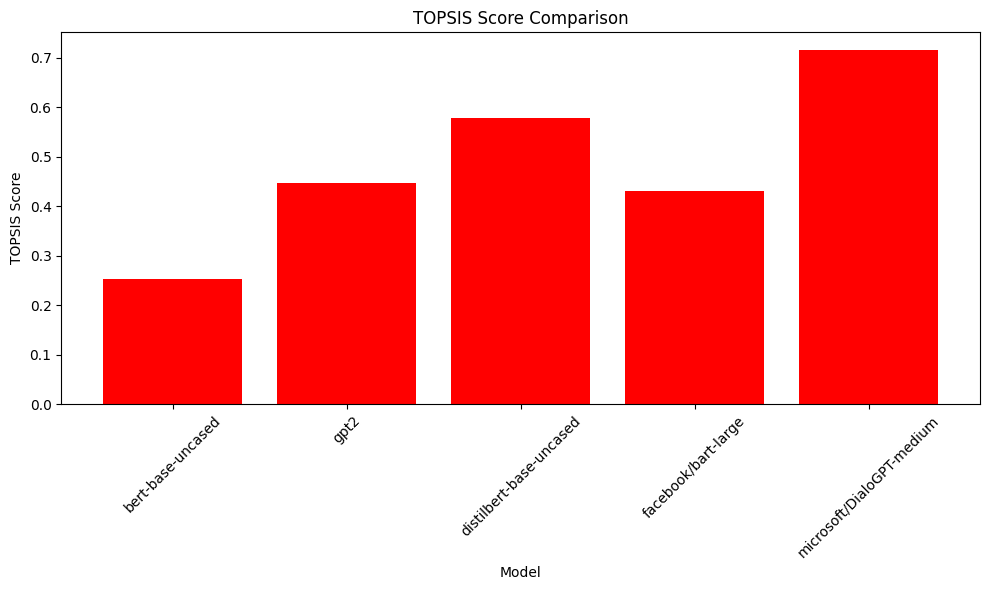

In [4]:
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('result.csv')

# Plotting function for each metric
def plot_metric(metric_name):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Model'], data[metric_name], color='blue')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{metric_name}_comparison.png')
    plt.show()

# Generate plots for each metric
metrics = ['Accuracy', 'Response_Time', 'Perplexity', 'F1_Score', 'Memory_Usage']
for metric in metrics:
    plot_metric(metric)

# Plot for TOPSIS Scores
plt.figure(figsize=(10, 6))
plt.bar(data['Model'], data['TOPSIS_Score'], color='red')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Score Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('TOPSIS_Score_comparison.png')
plt.show()

